# Insurance Cross Sell Challenge

- Insurance all is a company that provides health insurance to its costumers and the products team is analyzing the possibilty of offering policyholders car insurance with a similar year subscription.

- The sales team conducted a survey with 380.000 costumers and stored all data in a 

- For this year 



# O PROBLEMA 

 ## TASKS
 
1 - Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

2 - Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

3- E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

4 - Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?
  
 

# 0.0 Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as pg
from IPython.core.display  import HTML



## 0.1 Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data 

### 0.2.1 Connecting to DB

In [7]:
#Connection to Database

conn = pg.connect( user=username,
                   password=pwd,
                   host=host,
                   port=port,
                   database=database )

### 0.2.2 Schema Query

In [6]:
cursor = conn.cursor()

query_schema = """
         SELECT nspname
         FROM pg_catalog.pg_namespace
"""

cursor.execute ( query_schema )

In [7]:
record = cursor.fetchall()
cursor.close()


In [8]:
record

[('pg_toast',),
 ('pg_temp_1',),
 ('pg_toast_temp_1',),
 ('pg_catalog',),
 ('information_schema',),
 ('public',),
 ('pa004',)]

record = cursor.fetchall()

### 0.2.3 Table Query

In [9]:
cursor = conn.cursor()

query_tables = """
         SELECT tablename
         FROM pg_tables
         WHERE schemaname='pa004'
"""

cursor.execute ( query_tables )

record = cursor.fetchall()
print( record )

cursor.close()


[('users',), ('vehicle',), ('insurance',)]


### 0.2.4 Raw Dataframe Query

In [8]:
query_data = """
         SELECT *
         FROM pa004.users u
         LEFT JOIN pa004.vehicle v ON ( u.id=v.id )
         LEFT JOIN pa004.insurance i ON ( u.id=i.id )
"""

### 0.2.5 Loading the data to df_raw

In [9]:
df_raw = pd.read_sql( query_data, conn )
conn.close()

In [12]:
# check table
df_raw.head()

,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,7,1,< 1 Year,Yes,7,0,23367.0,249,0
1,13,Female,41,15.0,14.0,13,1,1-2 Year,No,13,1,31409.0,221,0
2,18,Female,25,35.0,152.0,18,1,< 1 Year,No,18,1,46622.0,299,0
3,31,Female,26,8.0,160.0,31,1,< 1 Year,No,31,0,2630.0,136,0
4,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0


In [14]:
# dropping dulpicated columns
df_raw = df_raw.iloc[:, ~df_raw.columns.duplicated()]

# 1.0 Data Details

In [15]:
df1 = df_raw.copy()

## 1.1 Columns

 - Id: Unique ID for the customer.
 
- Gender: Gender of the customer. 

- Age: Age of the customer.

- Driving License: 0, customer does not have DL; 1, customer already has DL.

- Region Code: Unique code for the region of the customer.

- Previously Insured: 1, customer already has vehicle insurance; 0, customer doesn't have vehicle insurance.

- Vehicle Age: Age of the vehicle.Vehicle Damage: 1, customer got his/her vehicle damaged in the past; 0, customer didn't get his/her vehicle damaged in the past.

- Anual Premium: The amount customer needs to pay as premium in the year.

- Policy sales channel: Anonymized Code for the channel of outreaching to the customer ie.

- Different Agents, Over Mail, Over Phone, In Person, etc.

- Vintage: Number of Days, customer has been associated with the company.

- Response: 1, customer is interested; 0, customer is not interested.
 

In [30]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.2 Data Dimensions 

In [31]:
df1.shape

(381109, 12)

## 1.5 Missing Values 


In [32]:
#check for NA

df1.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.6 Change Types


In [33]:
# changing data types

df1['region_code'] = df1['region_code'].astype('int64')     

df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('int64')    

df1['annual_premium'] = df1['annual_premium'].astype('int64')    


In [34]:
df1['driving_license'].value_counts()

1    380297
0       812
Name: driving_license, dtype: int64

In [35]:
df1.dtypes

id                       int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
dtype: object

## 1.7 Descriptive Stastistics

In [36]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'])

### 1.7.1 Numerical Attributes

In [37]:
#Central Tendency - mean, meadian

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concat

m= pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,-8.071174e-18,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
4,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
5,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
6,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


C:\Users\eduar\anaconda3\envs\PA004\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='response', ylabel='Density'>

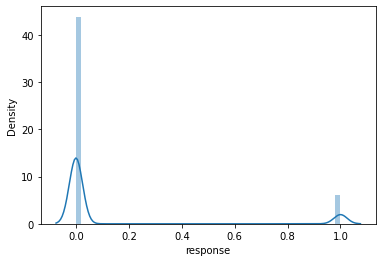

In [45]:
sns.distplot( df1['response'] )

### 1.7.2 Categorical Attributes

In [39]:
cat_attributes.describe().T

,count,unique,top,freq
gender,381109,2,Male,206089
vehicle_age,381109,3,1-2 Year,200316
vehicle_damage,381109,2,Yes,192413


<AxesSubplot:xlabel='vehicle_damage', ylabel='count'>

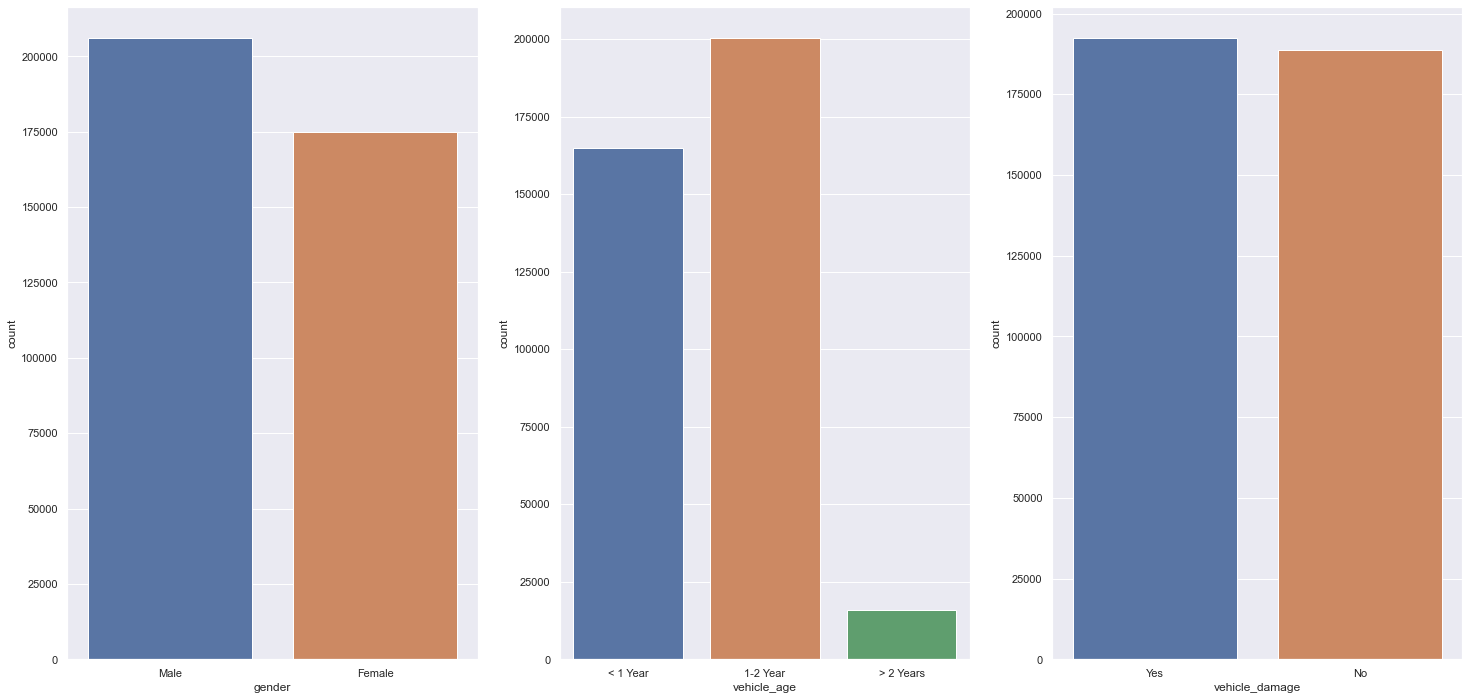

In [75]:
plt.subplot(1,3,1)
sns.countplot(x=df1['gender'])

plt.subplot(1,3,2)
sns.countplot(x=df1['vehicle_age'])

plt.subplot(1,3,3)
sns.countplot(x=df1['vehicle_damage'])

## 1.8 Normalazing Target

In [30]:
df1['response'].value_counts(normalize=True) 

0    0.877437
1    0.122563
Name: response, dtype: float64

# 2.0 Feature Engineering 

In [35]:
bdf2 = df1.copy()

## 2.1 Mind Map

In [38]:
from IPython.display       import Image


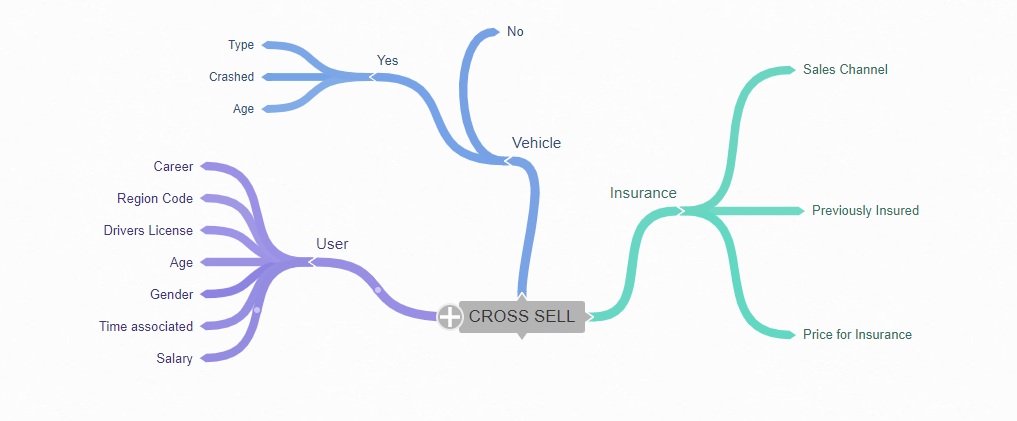

In [39]:
Image( 'img/mmpa004.png' )

## 2.2 Criação de Hipoteses

### 2.2.1 User

1. Younger users should be more interested.

2. Users with most time associated should be more interested.

3. Users with drivers license should be more interested.

### 2.2.2 Insurance

1. Users that already had a car insurance are less interessested then the one dont.

2. Users reached troughout the phone should be more interested.

3. Users with the annual premimum higher should be more interested.


### 2.2.3 Vehicle

1. Users with vehicles should be more interested

2. Users with already crashed vehicles should be more interested

3. Users that have older cars should have more interest


## 2.3 Final List

1. Younger users should be more interested.

2. Users with most time associated should be more interested.

3. Users with drivers license should be more interested.

4. Users that already had a car insurance are less interessested then the one dont.

5. Users reached troughout the phone should be more interested

6. Users with the price for insurance lower should be more interested

7. Users with vehicles should be more interested

8. Users with already crashed vehicles should be more interested

9. Users that have older cars should have more interest

## 2.4 Feature Engineering

# 3.0 Filtragem de variáveis

# 4.0 EDA

# 5.0 Modelagem dos dados

# 6.0 Feature Selection

# 7.0 Machine Learning Modelling

# 8.0 Hyperparameter fine tuning

# 9.0 Tradução e interpretação do erro

# 10.0 Deploy model to production